# Laboratorio 3.2: Clustering

Andrés Abeliuk, Hernán Sarmiento, Cinthia Sánchez, Jorge Ortiz

Octubre 2022

## ============= Declaración de compromiso ético =============

Nosotros ****Benjamin Aguilar Osorio, Felipe**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 2) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura del laboratorio

Este laboratorio consiste en 2 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección para entrenar y evaluar los métodos de clustering, incluyendo la interpretación de los resultados.

# Parte 1: Preguntas teóricas

**1.** ¿En qué se diferencian las tareas de clustering y clasificación? ¿Cuándo usar clustering y cuando clasificación? Liste al menos dos ejemplos de cada tarea.

>Respuesta: 


**2.** De acuerdo a lo visto en clases, explique cómo bisecting k-mean soluciona el problema de la inicialización de centroides de k-means.

>Respuesta:


**3.** Evaluar clusters no es una tarea fácil. ¿Qué formas de evaluar clusters conoce? Nombre al menos 3 formas y describa cómo podría determinar si los clusters son buenos o malos usando cada una de las formas nombradas.

>Respuesta:

# Parte 2: Preguntas prácticas

Para todo el laboratorio usaremos los siguientes datos. Estos contienen información de clientes de un centro comercial, como la edad, sexo, ingresos anuales y puntaje de gastos. Más información en: https://www.kaggle.com/datasets/kandij/mall-customers


*   Para entrenar los modelos deben usar los datos en `X`.
*   Para visualizar los datos deben usar una versión con dimensionalidad reducida, los cuales guardaremos en la variable `X_pca`. 



In [ ]:
import pandas as pd

dataframe = pd.read_csv("https://raw.githubusercontent.com/cinthiasanchez/Data-Mining/main/Mall_Customers.csv")
dataframe.drop('CustomerID', axis=1, inplace=True)
Genre = pd.get_dummies(dataframe['Genre'], prefix='Genre', drop_first=True)

X = pd.concat([dataframe, Genre], axis=1).drop('Genre', axis=1)
X.head()

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X) #para visualizar
X_pca.shape

(200, 2)

## K-means

Cuando usamos k-means debemos definir previamente el número de clusters que queremos generar. Para estimar un número óptimo usaremos el método del codo. Ejecute el siguiente bloque de código, el cual ejecuta `k-means` para `k` clusters, con `k` variando de 1 a 15 clusters. Cada ejecución de `k-means` elige los centroides iniciales al azar. Puede variar el parámetro `n_init` que indica cuántas veces se ejecutará k-means sobre los datos y entregará el clustering con el menor SSE. También puede variar `max_iter`, que indica cuántas veces iterará una ejecución de k-means.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=3, max_iter= 300).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

In [ ]:
i=1
j=len(sse)-1
lista=[]
while(j>i):
    lista.append(sse[i]/sse[i-1])

**Pregunta 1:** Según el gráfico anterior (usando el método del codo), ¿Cuántos clusters propone usar para este dataset? Escoja dos opciones y justifique su elección. ¿Qué puede decir del efecto de los parámetros `n_init` y `max_iter`? (tuvo que usar valores muy altos, muy bajos, etc.)

> Respuesta: 

**Pregunta 2:** Genere un gráfico para cada uno de los dos `k` elegidos para tener una representación visual de los clusters, y comente lo siguiente:

* ¿Qué puede decir de los clusters generados?
* ¿Existen patrones de agrupación?

In [ ]:
# Respuesta código



>Respuesta textual

## DBSCAN

Con DBSCAN necesitamos dos parámetros, `eps`y `min_samples`. El siguiente código permite estimar el valor `eps` usando el método de la rodilla (basado en KNN). La idea de este procedimiento es calcular la distancia promedio de cada punto a sus k vecinos más cercanos los cuales son graficados en orden ascendente. El objetivo es determinar la `rodilla`, que corresponde al valor óptimo de `eps`. 

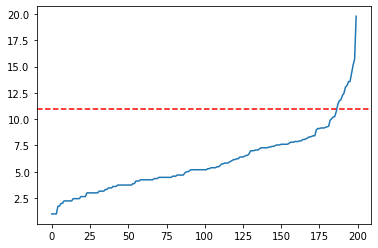

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

N = 5 #corresponde a 'min_samples'

nbrs = NearestNeighbors(n_neighbors=N).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=11, color='r', linestyle='--') #Ajuste el valor para y
plt.plot(distances);

**Pregunta 3:** Utilizando el método de la rodilla, pruebe varios valores de `y`, y escoja el que usted considere el mejor `y`. Grafique los clusters usando el método DBSCAN haciendo uso del parámetro `eps` (`y`) encontrado previamente, y `min_samples=5`. Comente:

* ¿Por qué escogió el valor `y` como mejor opción?
* ¿Cuántos clusters obtuvo? Imprima los clusters obtenidos. 
* ¿Qué puede decir de los clusters generados?

In [ ]:
# Respuesta código


>Respuesta textual

**Pregunta 4:** ¿Cómo cambia el resultado si ahora cambia el `N` (el valor de `min_samples`)?

Juegue con distintos valores de `N`, determine el `eps` correspondiente, y describa sus observaciones.

In [ ]:
#Respuesta código



>Respuesta textual

## Clustering Jerárquico Aglomerativo

**Pregunta 5:** Grafique un dendograma con el método `ward` y la métrica `euclidean`. Comente: ¿"visualmente" cuántos clusters propone usar? ¿A qué altura recomendaría cortar el árbol?

In [ ]:
#Respuesta código


>Respuesta textual

**Pregunta 6:** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta anterior y visualice los datos con su respectiva asignación. Comente lo siguiente:

* ¿Cuántos clusters obtuvo cortando a la altura que propuso en la pregunta anterior?
* ¿Qué puede decir de los clusters generados?

In [ ]:
#Respuesta código


>Respuesta textual

## Evaluación

Para evaluar clusters existen una serie de métodos y métricas. Para este laboratorio usaremos el **Coeficiente de Silhouette**.

**Pregunta 7:** Para cada uno de los experimentos, los dos de la parte de `kmeans` en la pregunta **2**, los dos de la parte de `dbscan` en la pregunta **3** y **4 (únicamente para el mejor caso)**, y el de `clustering jerárquico` en la pregunta **6**, imprima el Silhouette score de los modelos. Adjunte código.

In [ ]:
#Respuesta código


**Pregunta 8:** En base a los valores del coeficiente de Silhouette obtenidos para cada método y configuración, ¿cuál considera que es el que tiene mejor resultado? Argumente su respuesta.

>Respuesta textual

**Pregunta 9:** ¿Qué considera que representa cada cluster en este conjunto de datos? 

>Respuesta textual